In [1]:
import g3lhalo
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import scipy.integrate as integrate

In [2]:
model=g3lhalo.halomodel(1e-4, 1e7, 0.001, 2, 1e10, 1e16)

model.set_cosmo(0.25, 0.05, 0.7, 0.8, 0.96)
h=0.7




# Halo Profile

In [3]:
# NFW Profile
cmfunc=ccl.halos.ConcentrationDuffy08()
model.set_concentration_mass_relation(cmfunc)


ks=np.geomspace(1e-1, 1e4)
m1=1e11/h
m2=1e16/h
u1=model.u_NFW(ks, m1, 0, 1.)
u2=model.u_NFW(ks, m2, 0, 1.)


Text(0, 0.5, '$\\hat{u}(k, m)$')

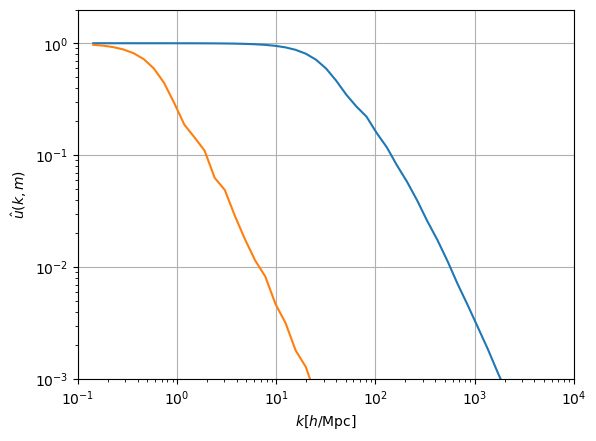

In [4]:

plt.xlim(1e-1, 1e4)
plt.ylim(1e-3, 2)

plt.loglog(ks/h, u1)
plt.loglog(ks/h, u2)
plt.grid()

plt.xlabel(r'$k [h/\mathrm{Mpc}]$')
plt.ylabel(r'$\hat{u}(k, m)$')

# Halo bias

In [5]:
# halo profile
hbf=ccl.halos.HaloBiasSheth01()
model.set_halobias(hbf)

ms= np.geomspace(1e10, 1e16)/h
bs=model.bh(ms, 0)

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_108585/3508382272.py:6: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$m [M_\odot/h]$")


Text(0, 0.5, '$b_h(m, z=0)$')

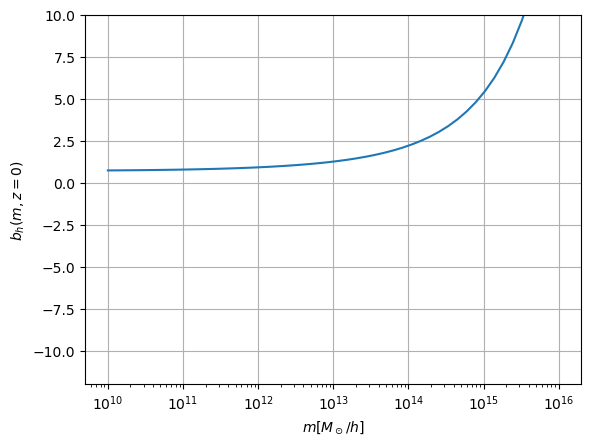

In [6]:
plt.xscale('log')
plt.ylim(-12, 10)
plt.plot(ms*h, bs)
plt.grid()

plt.xlabel("$m [M_\odot/h]$")
plt.ylabel("$b_h(m, z=0)$")

# HOD

In [7]:
# HOD

alpha=1
sigma=0.2
Mth=1e12/h
Mprime=20*Mth
beta=1

hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)


#hod_cen, hod_sat = g3lhalo.HOD_Zheng05(mmin=1e13/h, sigma=0.3, m0=1e13/h, m1=1e13/h, alpha=1)

model.set_hods(hod_cen, hod_sat)

ms=np.geomspace(1e10, 1e16)/h

Ncen=model.hod_cen1(ms)
Nsat=model.hod_sat1(ms)

Text(0.5, 0, '$m [M_\\odot/h]$')

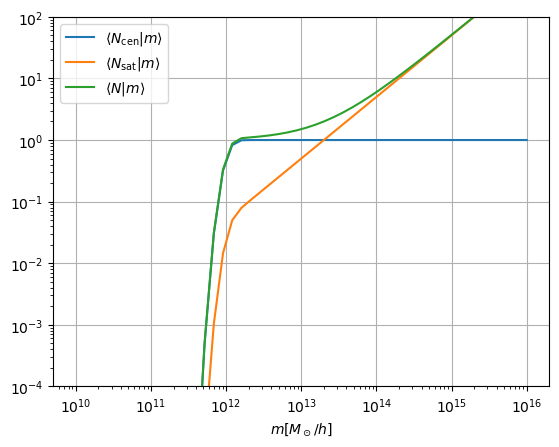

In [8]:
plt.ylim(1e-4, 100)
plt.loglog(ms*h, Ncen, label=r'$\langle N_\mathrm{cen} | m \rangle$')
plt.loglog(ms*h, Nsat, label=r'$\langle N_\mathrm{sat} | m \rangle$')
plt.loglog(ms*h, Ncen+Nsat, label=r'$\langle N | m \rangle$')
plt.grid()
plt.legend()
plt.xlabel(r"$m [M_\odot/h]$")

# Linear Matter Power spectrum

Text(0, 0.5, 'linear $P(k) [\\mathrm{Mpc}^3/h^3]$')

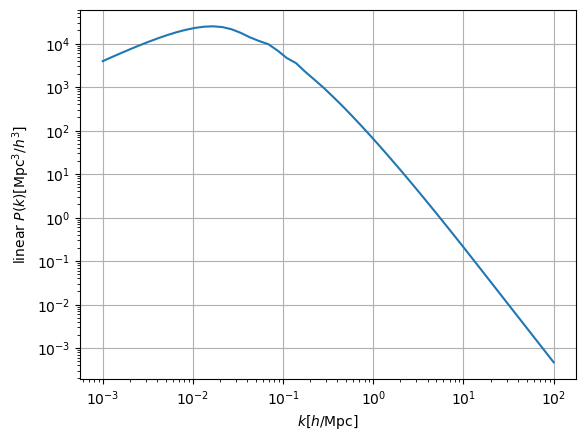

In [9]:
ks=np.geomspace(1e-3, 1e2)*h

Pk=model.pk_lin(ks, 0)

plt.loglog(ks/h, Pk*h**3)

plt.grid()
plt.xlabel(r"$k [h/\mathrm{Mpc}]$")
plt.ylabel(r"linear $P(k) [\mathrm{Mpc}^3/h^3]$")

# Halo mass function

In [10]:

hmf=ccl.halos.MassFuncSheth99()
model.set_hmf(hmf)

rhobar=ccl.rho_x(model.cosmo,1, 'matter')

ms=np.geomspace(1e9, 1e16)/h

f=ms*ms*model.dndm(ms, 0)/rhobar

(1000000000.0, 1e+16)

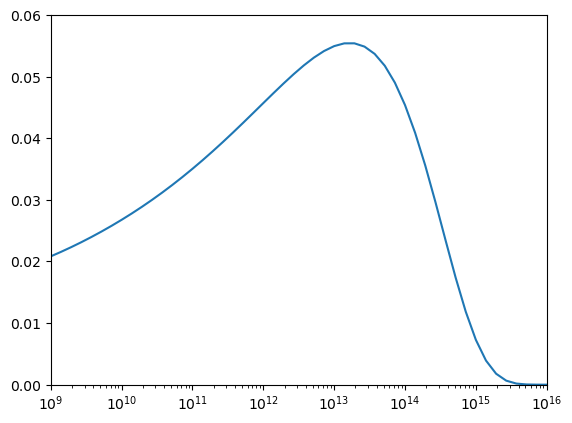

In [11]:
plt.xscale('log')
plt.plot(ms*h, f)

plt.ylim(0, 0.06)
plt.xlim(1e9, 1e16)


# Halo mass function normalisation

In [12]:
kernel = lambda m: model.dndm(m, 0)*m

rho_int = integrate.quad(kernel, model.mmin, model.mmax)


rho_bar=ccl.rho_x(model.cosmo, 1, 'matter')

print(rho_int, rho_bar)
print(rho_int[0]/rho_bar)

(19415955804.910435, 56.88686914418213) 40797884205.13712
0.4759059491243334


In [13]:
1/np.log(10)

0.43429448190325176

In [14]:
kernel = lambda m: model.dndm(m, 0)*m*model.bh(m,0)

rho_int2 = integrate.quad(kernel, 1e10, 1e16)


rho_bar=ccl.rho_x(model.cosmo, 1, 'matter')

print(rho_int2, rho_bar)
print(rho_int2[0]/rho_bar)

(27428574429.848408, 65.37910032714535) 40797884205.13712
0.6723038452664342


# Matter-Matter Power spectrum

In [15]:

hmf=ccl.halos.MassFuncSheth99()
model.set_hmf(hmf)
ks=np.geomspace(1e-3, 100)*h

P1h_ss, P2h_ss, P_ss = model.source_source_ps(ks, 0)


conversion=ks**3/2/np.pi/np.pi

Calculating One_halo
Calculating Two_halo


In [ ]:
model.cosmo.omega_x()

In [16]:
pklin=model.pk_lin(ks, 0)

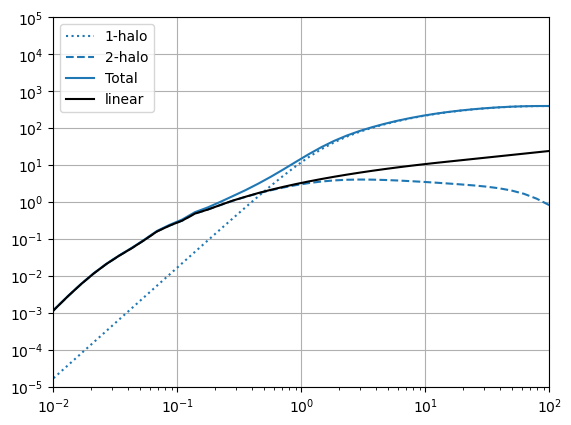

In [17]:
plt.ylim(1e-5, 1e5)
plt.xlim(1e-2, 100)


plt.loglog(ks/h, P1h_ss*conversion, label='1-halo', color='C0', ls=':')

plt.loglog(ks/h, P2h_ss*conversion, label='2-halo', color='C0', ls='--')


plt.loglog(ks/h, P_ss*conversion, label='Total', color='C0', ls='-')
plt.loglog(ks/h, pklin*conversion, label='linear', color='k')
plt.legend()
plt.yticks(np.geomspace(1e-5, 1e5, 11))
plt.grid()

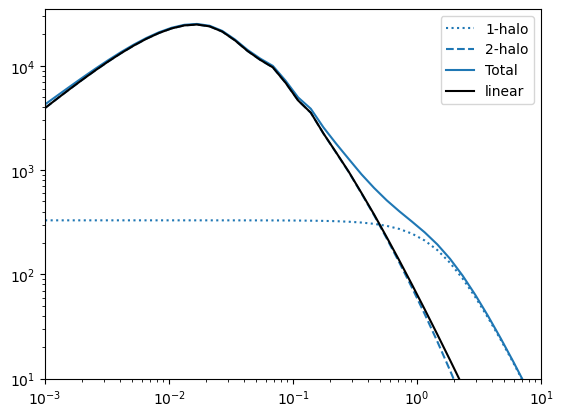

In [18]:
plt.ylim(10, 3.5e4)
plt.xlim(1e-3, 10)

plt.loglog(ks/h, P1h_ss*h**3, label='1-halo', color='C0', ls=':')

plt.loglog(ks/h, P2h_ss*h**3, label='2-halo', color='C0', ls='--')


plt.loglog(ks/h, P_ss*h**3, label='Total', color='C0', ls='-')
plt.loglog(ks/h, pklin*h**3, label='linear', color='k')
plt.legend()
#plt.yticks(np.geomspace(1e-5, 1e5, 11))
#plt.grid()

In [19]:
np.log(10)

2.302585092994046

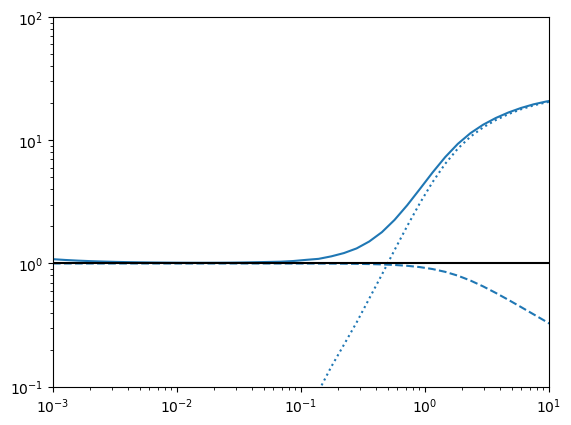

In [20]:
plt.ylim(1e-1, 1e2)
plt.xlim(1e-3, 10)

plt.loglog(ks/h, P1h_ss/pklin, color='C0', ls=':')
plt.loglog(ks/h, P2h_ss/pklin, color='C0', ls='--')
plt.loglog(ks/h, P_ss/pklin, color='C0', ls='-')



plt.hlines([1], 1e-3, 1e2, color='k',ls='-')


# Galaxy Power Spectrum

In [21]:

hmf=ccl.halos.MassFuncSheth99()
model.set_hmf(hmf)
ks=np.geomspace(1e-3, 100)*h

P1h_ll, P2h_ll, P_ll = model.lens_lens_ps(ks, 0, type1=1, type2=1)


conversion=ks**3/2/np.pi/np.pi

In [22]:
pk=model.pk_lin(ks, 0)

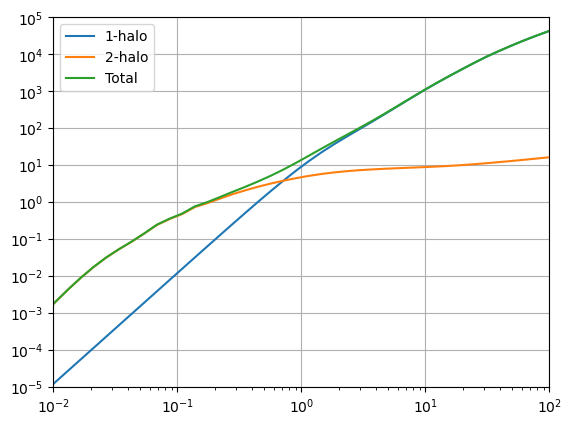

In [23]:
plt.ylim(1e-5, 1e5)
plt.xlim(1e-2, 100)
plt.loglog(ks/h, P1h_ll*conversion, label='1-halo')
plt.loglog(ks/h, P2h_ll*conversion, label='2-halo')

plt.loglog(ks/h, P_ll*conversion, label='Total')

plt.legend()
plt.yticks(np.geomspace(1e-5, 1e5, 11))
plt.grid()
#plt.grid()

# Galaxy - Matter Power spectrum

In [24]:
ks=np.geomspace(1e-3, 100)*h

P1h_sl, P2h_sl, P_sl = model.source_lens_ps(ks, 0, type=1)


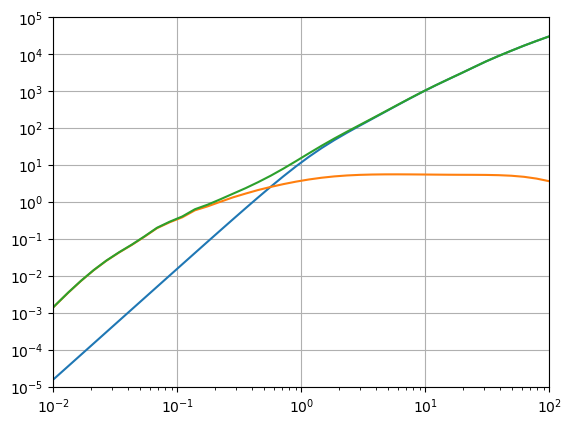

In [25]:
plt.ylim(1e-5, 1e5)
plt.xlim(1e-2, 100)
plt.loglog(ks/h, P1h_sl*ks**3/2/np.pi/np.pi)
plt.loglog(ks/h, P2h_sl*ks**3/2/np.pi/np.pi)
plt.loglog(ks/h, P_sl*ks**3/2/np.pi/np.pi)
plt.yticks(np.geomspace(1e-5, 1e5, 11))

plt.grid()

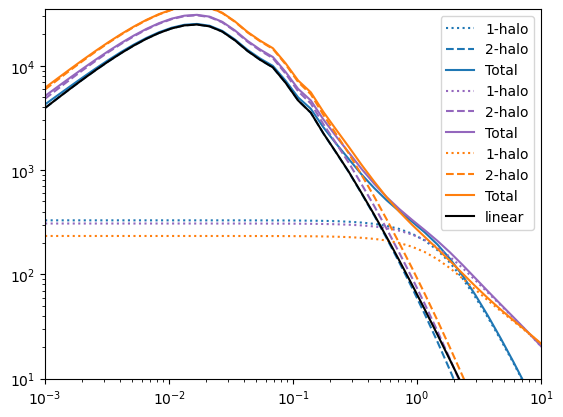

In [26]:
plt.ylim(10, 3.5e4)
plt.xlim(1e-3, 10)

plt.loglog(ks/h, P1h_ss*h**3, label='1-halo', color='C0', ls=':')
plt.loglog(ks/h, P2h_ss*h**3, label='2-halo', color='C0', ls='--')
plt.loglog(ks/h, P_ss*h**3, label='Total', color='C0', ls='-')

plt.loglog(ks/h, P1h_sl*h**3, label='1-halo', color='C4', ls=':')
plt.loglog(ks/h, P2h_sl*h**3, label='2-halo', color='C4', ls='--')
plt.loglog(ks/h, P_sl*h**3, label='Total', color='C4', ls='-')

plt.loglog(ks/h, P1h_ll*h**3, label='1-halo', color='C1', ls=':')
plt.loglog(ks/h, P2h_ll*h**3, label='2-halo', color='C1', ls='--')
plt.loglog(ks/h, P_ll*h**3, label='Total', color='C1', ls='-')


plt.loglog(ks/h, pklin*h**3, label='linear', color='k')


plt.legend()
#plt.yticks(np.geomspace(1e-5, 1e5, 11))
#plt.grid()

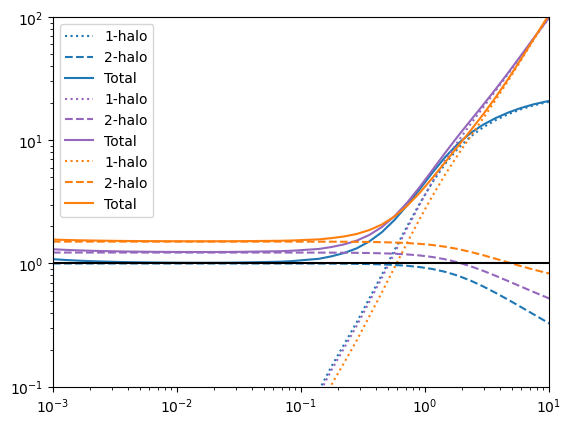

In [27]:
plt.ylim(1e-1, 100)
plt.xlim(1e-3, 10)

plt.loglog(ks/h, P1h_ss/pklin, label='1-halo', color='C0', ls=':')
plt.loglog(ks/h, P2h_ss/pklin, label='2-halo', color='C0', ls='--')
plt.loglog(ks/h, P_ss/pklin, label='Total', color='C0', ls='-')

plt.loglog(ks/h, P1h_sl/pklin, label='1-halo', color='C4', ls=':')
plt.loglog(ks/h, P2h_sl/pklin, label='2-halo', color='C4', ls='--')
plt.loglog(ks/h, P_sl/pklin, label='Total', color='C4', ls='-')

plt.loglog(ks/h, P1h_ll/pklin, label='1-halo', color='C1', ls=':')
plt.loglog(ks/h, P2h_ll/pklin, label='2-halo', color='C1', ls='--')
plt.loglog(ks/h, P_ll/pklin, label='Total', color='C1', ls='-')

plt.hlines([1], 1e-3, 10, color='k')

#plt.loglog(ks/h, pklin*h**3, label='linear', color='k')


plt.legend()
#plt.yticks(np.geomspace(1e-5, 1e5, 11))
#plt.grid()

# Galaxy-Galaxy-Matter Bispectrum

In [28]:
ks=np.geomspace(1e-3, 100)*h

B1h_sll=[]
B2h_sll=[]
B3h_sll=[]
B_sll=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_lens_lens_bs(k, k, k, 0,  1, 1)
    B1h_sll.append(B1h)
    B2h_sll.append(B2h)
    B3h_sll.append(B3h)
    B_sll.append(B)

B1h_sll=np.array(B1h_sll)
B2h_sll=np.array(B2h_sll)
B3h_sll=np.array(B3h_sll)
B_sll=np.array(B_sll)


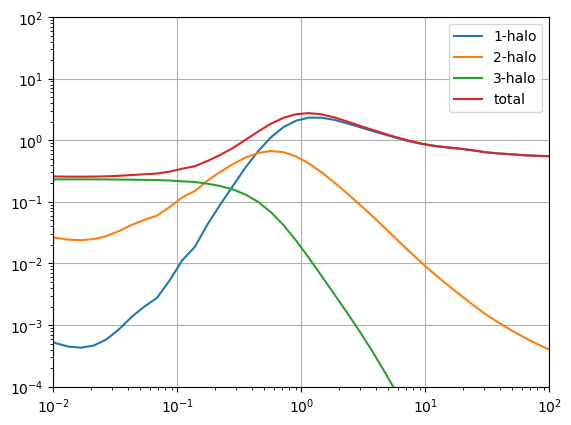

In [29]:
Q1h_sll=B1h_sll/(P_sl**2+2*P_ll*P_sl)
Q2h_sll=B2h_sll/(P_sl**2+2*P_ll*P_sl)
Q3h_sll=B3h_sll/(P_sl**2+2*P_ll*P_sl)
Q_sll=B_sll/(P_sl**2+2*P_ll*P_sl)




plt.xlim(1e-2, 100)
plt.ylim(1e-4, 100)
plt.loglog(ks/h, Q1h_sll, label='1-halo')
plt.loglog(ks/h, Q2h_sll, label='2-halo')
plt.loglog(ks/h, Q3h_sll, label='3-halo')
plt.loglog(ks/h, Q_sll, label='total')
plt.legend()
plt.grid()



# Galaxy-Matter-Matter Bispectrum

In [30]:
ks=np.geomspace(1e-3, 100)*h

B1h_ssl=[]
B2h_ssl=[]
B3h_ssl=[]
B_ssl=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_source_lens_bs(k, k, k, 0,  1)
    B1h_ssl.append(B1h)
    B2h_ssl.append(B2h)
    B3h_ssl.append(B3h)
    B_ssl.append(B)

B1h_ssl=np.array(B1h_ssl)
B2h_ssl=np.array(B2h_ssl)
B3h_ssl=np.array(B3h_ssl)
B_ssl=np.array(B_ssl)


/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:506: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  summand1 *= integrate.quad(kernel, self.mmin, self.mmax)[0]


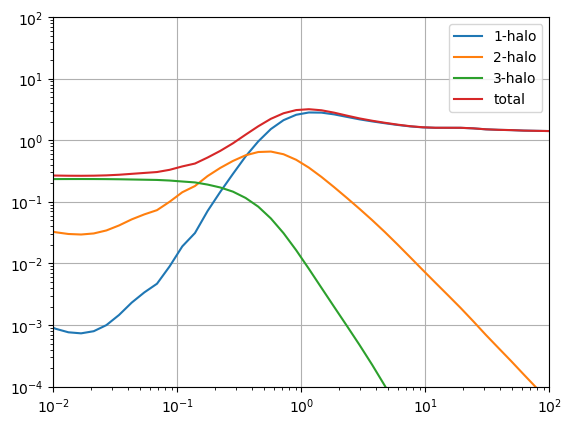

In [32]:
Q1h_ssl=B1h_ssl/(P_sl**2+2*P_ss*P_sl)
Q2h_ssl=B2h_ssl/(P_sl**2+2*P_ss*P_sl)
Q3h_ssl=B3h_ssl/(P_sl**2+2*P_ss*P_sl)
Q_ssl=B_ssl/(P_sl**2+2*P_ss*P_sl)




plt.xlim(1e-2, 100)
plt.ylim(1e-4, 100)
plt.loglog(ks/h, Q1h_ssl, label='1-halo')
plt.loglog(ks/h, Q2h_ssl, label='2-halo')
plt.loglog(ks/h, Q3h_ssl, label='3-halo')
plt.loglog(ks/h, Q_ssl, label='total')
plt.legend()
plt.grid()

